# Graphillion チュートリアル
https://github.com/takemaru/graphillion/wiki

In [1]:
from graphillion import GraphSet
import graphillion.tutorial as tl  # チュートリアルのためのヘルパー・モジュール

In [3]:
%matplotlib inline

## 格子グラフ上のパス

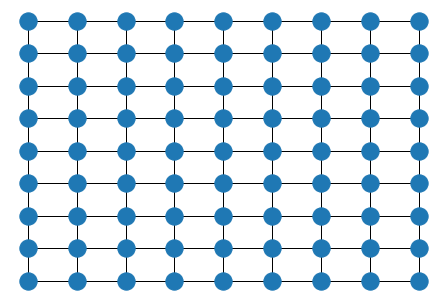

In [4]:
universe = tl.grid(8, 8)
GraphSet.set_universe(universe)
tl.draw(universe)  # ユニバースをポップアップウィンドウで表示する

In [5]:
start = 1
goal = 81
paths = GraphSet.paths(start, goal)
len(paths)  # 結果が大規模のときは paths.len() を使う

3266598486981642

In [10]:
paths

GraphSet([[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), ( ...

In [16]:
cnt = 0
for path in paths:
    print(path)
    cnt += 1
    if cnt >= 3: # 最初の3件を表示
        break

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 18), (10, 11), (10, 19), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 36), (28, 29), (28, 37), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 54), (46, 47), (46, 55), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 72), (64, 65), (64, 73), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81)]
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 18), (10, 11), (10, 19), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (2

C:\Users\PXK13\Anaconda3\envs\graphillion\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


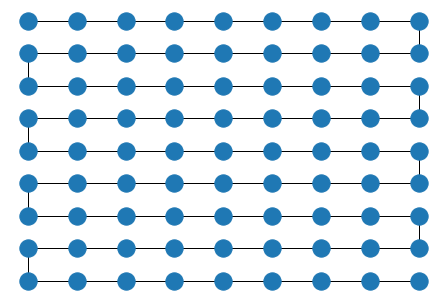

In [17]:
tl.draw(paths.choice())  # パスのひとつを表示する

In [18]:
key = 64
treasure = 18
paths_to_key = GraphSet.paths(start, key).excluding(treasure)  # 宝箱を通らずに鍵にたどり着くパス
treasure_paths = paths.including(paths_to_key).including(treasure)  # 鍵と宝箱を通ってゴールにたどり着くパス
len(treasure_paths)

789438891932744

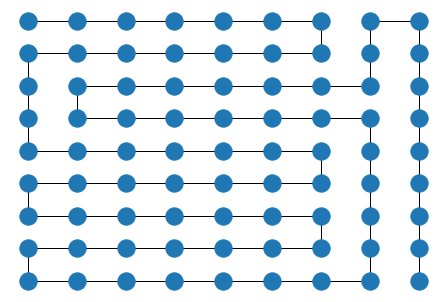

In [19]:
tl.draw(treasure_paths.choice())  # パスのひとつを表示する

In [20]:
treasure_paths < paths  # Graphillion において "<" は "subset-of" の意味

True

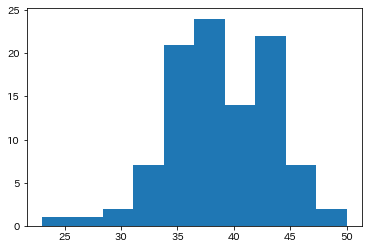

In [23]:
i = 0
data = []
for path in treasure_paths.rand_iter():
    data.append(tl.how_many_turns(path))  # パスが曲がる回数を数える
    if i == 100:
        break
    i += 1
tl.hist(data)

5


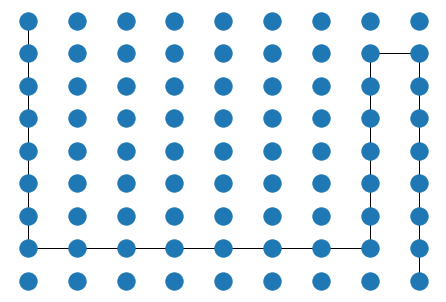

In [25]:
for path in treasure_paths.min_iter():
    print(tl.how_many_turns(path))
    tl.draw(path) 
    break  # break しないと、複数のパスが昇順で取り出される

## 配電ネットワークにおける電力フロー

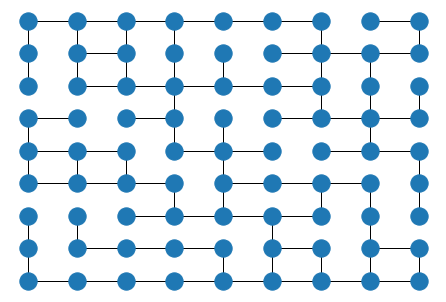

In [26]:
universe = tl.grid(8, 8, 0.37)  # 8x8 の格子からランダムに 37 % の辺が取り除かれる
GraphSet.set_universe(universe)
generators = [1, 9, 73, 81]
tl.draw(universe)

In [27]:
forests = GraphSet.forests(roots=generators, is_spanning=True)  # forest にはすべての家庭をカバーし、かつループのない電力フローが格納される
len(forests)

21575876880

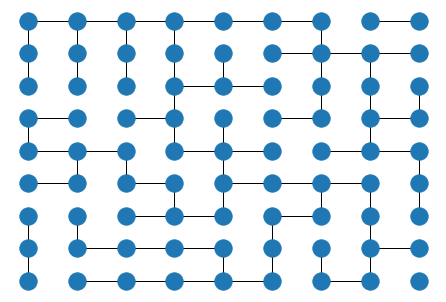

In [28]:
tl.draw(forests.choice())

In [29]:
too_large_trees = GraphSet()  # 空のグラフセット
for substation in generators:
    too_large_trees |= GraphSet.trees(root=substation).larger(23)  # 危険な電力フロー

In [30]:
safe_forests = forests.excluding(too_large_trees)  # 危険なケースを取り除いた、安全な電力フロー
len(safe_forests)

39688560

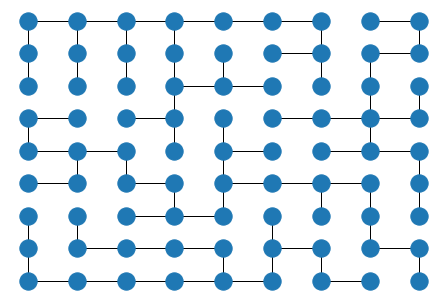

In [31]:
tl.draw(safe_forests.choice())

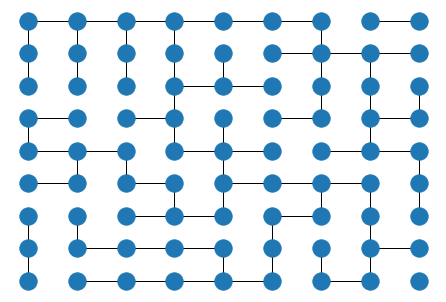

In [32]:
closed_switches = (forests - safe_forests).choice()  # 安全でない電力フローにおけるオン状態(closed)スイッチの集合
tl.draw(closed_switches)

In [33]:
scores = {}  # 新しい設定におけるオン状態スイッチのスコア（デフォルトは 0）
for switch in universe:
    # もし現在の状態がオンならスコアは 1、でなければスコアは -1
    scores[switch] = 1 if switch in closed_switches else -1

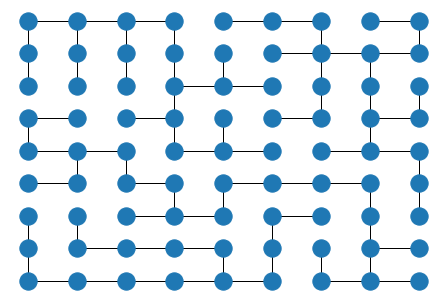

In [34]:
for forest in safe_forests.max_iter(scores):
    tl.draw(forest)
    break  # break しないと、複数の設定がスコアの高いものから取り出される

In [35]:
failures = safe_forests.blocking().minimal()  # すべての極小ブロッキングセットからなる集合

In [36]:
failure = failures.choice()  # ヒッティングセット（クリティカルな電力線の集合）
for line in failure:
    safe_forests = safe_forests.excluding(line)  # ヒッティングセットに含まれる電力線を取り除く

In [37]:
len(safe_forests)

0

In [38]:
len(failures.smaller(5))

824